In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab #Imports matplotlib and a host of other useful modules
import pickle
import time

import sys
# sys.path.append("./")
import motion_planner as mp
from motion_planner import StateP

In [2]:
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('Logging enabled in notebook')


08:22:10 INFO:Logging enabled in notebook


In [4]:
mp = reload(mp)

# Examine Reflection

In [35]:
ls /temp/valkyrierobotics/mp_stages/runs/180.mar9/

180                            n_unreachables.pickle
README.180                     ne_180_34.log
bad34/                         ne_remaining.pickle
n_180_34.log                   ne_sample.pickle
n_remaining.pickle             ne_sample_stage2.pickle
n_sample.pickle                ne_sample_stage4.pickle
n_sample_stage2.pickle         ne_sample_traj.pickle
n_sample_stage4.pickle         ne_sample_unreachables.pickle
n_sample_traj.pickle           ne_stage1.pickle
n_sample_unreachables.pickle   ne_stage2.pickle
n_stage1.pickle                ne_stage3.pickle
n_stage2.pickle                ne_stage4.pickle
n_stage3.pickle                ne_unreachables.pickle
n_stage4.pickle


#### Reflection of stage1 states

In [34]:
config = mp.load_config('/temp/valkyrierobotics/mp_stages/runs/180.mar9/n_stage1.pickle')
print len(config)
minx = min([k[0] for k in config.iterkeys()])
print minx
c_minx = dict([(k,v) for k,v in config.iteritems() if k[0] <= -minx])
print len(c_minx)
del config
c_reflection = dict([(k,v) for k,v in c_minx.iteritems() if k[0] < 0 and (-k[0],k[1],k[2]) in c_minx])
print len(c_reflection)

08:53:57 INFO:Loading pickle file : /temp/valkyrierobotics/mp_stages/runs/180.mar9/n_stage1.pickle


110930
-4
9985
1284


9985


1284


In [14]:
ii=0
max=11
for k,v in c_reflection.iteritems():
    mp.print_state(k,v)
    mp.print_state((-k[0],k[1],k[2]), c_minx[(-k[0],k[1],k[2])])
    print
    ii+=1
    if ii>max:
        break
        

    (-1, 28, 4) : g1:    (-1, 20, 0)  r:  91.5  type: rh  d:  8.0   g2:           None  d2:  None  samples: 305
     (1, 28, 4) : g1:   (1, 20, 354)  r:  46.5  type: rh  d:  8.0   g2:           None  d2:  None  samples: 58

   (-1, 117, 6) : g1:  (-1, 20, 354)  r: 450.0  type: rh  d: 97.2   g2:           None  d2:  None  samples: 8
    (1, 117, 6) : g1:   (1, 20, 354)  r: 490.0  type: rh  d: 97.2   g2:           None  d2:  None  samples: 8

    (-3, 99, 4) : g1:     (0, 20, 0)  r:1200.0  type: rh  d: 79.0   g2:           None  d2:  None  samples: 12
     (3, 99, 4) : g1:   (1, 20, 354)  r: 500.0  type: rh  d: 79.1   g2:           None  d2:  None  samples: 1

    (-1, 89, 4) : g1:     (0, 20, 0)  r:1200.0  type: rh  d: 69.0   g2:           None  d2:  None  samples: 16
     (1, 89, 4) : g1:   (0, 20, 354)  r: 440.0  type: rh  d: 69.1   g2:           None  d2:  None  samples: 24

   (-1, 34, 10) : g1:     (0, 20, 0)  r: 196.0  type: rh  d: 14.0   g2:           None  d2:  None  samples: 16

#### Reflection of stage2 states


In [30]:
#config2 = mp.load_config('/temp/valkyrierobotics/mp_stages/runs/180.mar9/n_stage2.pickle')
config2 = mp.load_config('/temp/valkyrierobotics/mp_stages/runs/180.mar9/n_sample_stage2.pickle')

print len(config2)
minx2 = min([k[0] for k in config2.iterkeys()])
print minx2
c_minx2 = dict([(k,v) for k,v in config2.iteritems() if k[0] <= -minx2])
del config2
print len(c_minx2)
c_reflection2 = dict([(k,v) for k,v in c_minx2.iteritems() if k[0] < 0 and mp.is_stage2(v) and (-k[0],k[1],k[2]) in c_minx2])
print len(c_reflection2)


08:48:23 INFO:Loading pickle file : /temp/valkyrierobotics/mp_stages/runs/180.mar9/n_sample_stage2.pickle


177120
-5
14367
22


In [36]:
ii=0
max=11
for k,v in c_reflection2.iteritems():
    mp.print_state(k,v)
    mp.print_state((-k[0],k[1],k[2]), c_minx2[(-k[0],k[1],k[2])])
    print
    ii+=1
    if ii>max:
        break
        


 (-2, 110, 350) : g1:   (-3, 107, 2)  r:  15.0  type: lh  d: 90.2   g2:    (-1, 20, 0)  d2:   3.2  samples: 3
  (2, 110, 350) : g1:     (0, 20, 6)  r: 340.0  type: lh  d: 90.3   g2:           None  d2:  None  samples: 10

 (-2, 102, 352) : g1:    (-3, 99, 4)  r:  15.0  type: lh  d: 82.2   g2:     (0, 20, 0)  d2:   3.2  samples: 3
  (2, 102, 352) : g1:     (0, 20, 6)  r: 330.0  type: lh  d: 82.2   g2:           None  d2:  None  samples: 4

  (-3, 54, 352) : g1:   (-3, 49, 12)  r:  15.0  type: lh  d: 34.1   g2:     (0, 20, 0)  d2:   5.0  samples: 3
   (3, 54, 352) : g1:     (1, 20, 0)  r: 230.0  type: lh  d: 34.1   g2:           None  d2:  None  samples: 24

  (-1, 95, 350) : g1:    (-2, 92, 2)  r:  15.0  type: lh  d: 75.2   g2:    (-1, 20, 0)  d2:   3.2  samples: 3
   (1, 95, 350) : g1:    (-1, 20, 6)  r: 280.0  type: lh  d: 75.2   g2:           None  d2:  None  samples: 6

   (-3, 77, 82) : g1:   (9, 58, 342)  r:  15.0  type: rh  d: 64.3   g2:   (1, 20, 354)  d2:  25.4  samples: 3
    

#### Mirror reflection of stage1 
Same goal1, ideally type is reversed and everything else is also

In [38]:
config = mp.load_config('/temp/valkyrierobotics/mp_stages/runs/180.mar9/n_stage1.pickle')
print len(config)
minx = min([k[0] for k in config.iterkeys()])
print minx
c_minx = dict([(k,v) for k,v in config.iteritems() if k[0] <= -minx])
print len(c_minx)
del config
c_reflection = dict([(k,v) for k,v in c_minx.iteritems() if k[0] < 0 and (-k[0],k[1],k[2]) in c_minx 
                     and v.goal1()[0] == c_minx[(-k[0],k[1],k[2])].goal1()[0]
                     and v.goal1()[1] == c_minx[(-k[0],k[1],k[2])].goal1()[1]
                    ])
print len(c_reflection)

08:58:18 INFO:Loading pickle file : /temp/valkyrierobotics/mp_stages/runs/180.mar9/n_stage1.pickle


110930
-4
9985
396


In [39]:
ii=0
max=11
for k,v in c_reflection.iteritems():
    mp.print_state(k,v)
    mp.print_state((-k[0],k[1],k[2]), c_minx[(-k[0],k[1],k[2])])
    print
    ii+=1
    if ii>max:
        break

    (-1, 89, 4) : g1:     (0, 20, 0)  r:1200.0  type: rh  d: 69.0   g2:           None  d2:  None  samples: 16
     (1, 89, 4) : g1:   (0, 20, 354)  r: 440.0  type: rh  d: 69.1   g2:           None  d2:  None  samples: 24

   (-4, 108, 2) : g1:     (1, 20, 6)  r:1100.0  type: lh  d: 88.2   g2:           None  d2:  None  samples: 3
    (4, 108, 2) : g1:   (1, 20, 354)  r: 700.0  type: rh  d: 88.1   g2:           None  d2:  None  samples: 2

  (-1, 69, 354) : g1:    (-1, 20, 6)  r: 250.0  type: lh  d: 49.1   g2:           None  d2:  None  samples: 6
   (1, 69, 354) : g1:    (-1, 20, 0)  r: 420.0  type: lh  d: 49.1   g2:           None  d2:  None  samples: 24

   (-4, 106, 2) : g1:     (1, 20, 6)  r:1100.0  type: lh  d: 86.2   g2:           None  d2:  None  samples: 3
    (4, 106, 2) : g1:   (1, 20, 354)  r: 700.0  type: rh  d: 86.1   g2:           None  d2:  None  samples: 2

    (-1, 80, 2) : g1:     (0, 20, 0)  r:1900.0  type: rh  d: 60.0   g2:           None  d2:  None  samples: 48
  

# List home directory

In [5]:
ls '.'

arcs.ipynb                     ne_sample.pickle
evaluate.ipynb                 ne_sample_stage2.pickle
field_drawings.ipynb           ne_sample_stage4.pickle
load_mp.py                     ne_sample_traj.pickle
mem_profiling.py               ne_sample_unreachables.pickle
motion_planner.py              ne_stage1.pickle
motion_planner.pyc             ne_stage2.pickle
mp_deprecated.ipynb            ne_stage3.pickle
n_remaining.pickle             ne_stage4.pickle
n_sample.pickle                ne_unreachables.pickle
n_sample_stage2.pickle         oldcode/
n_sample_stage4.pickle         readme.md
n_sample_traj.pickle           requirements.txt
n_sample_unreachables.pickle   results.txt
n_stage1.pickle                runs/
n_stage2.pickle                sample_trajectories.ipynb
n_stage3.pickle                spacefilling_circles.ipynb
n_stage4.pickle                test-360.ipynb
n_unreachables.pickle          test.ipynb
ne_remaining.pickle


### Visual collision check.
There should be not be any points lying within half the robot length from the wall.
The following drawing shows that there are only a few points lying within a comfortable tolerance (half robot length plus a few inches)

# TODOs
* Convert table to c readable binary format


# Done
* Visualize various types of trajectories
* Run on northeast goal
* Reduced memory by packing configuration state table into bytearray representation
* Wrote path checker to locate invalid or kinky paths.
* Handles dead zones that block forwards driving using reverse direction turn until encounter filled state
* Implemented stage3 as quickturn maneuver to heading at same location having shortest path to goal.
* Plotted stage2 paths leading into same waypoint goal, then following path leading to primary goal.
* Plotted stage2 paths leading into same waypoint goal.
* Stage 1 planner stores goal2 (waypoint goal) for all stage1 states.
* Created set of unreachable/impossible configurations and used in planner to reduce search space
* Created mask for field element obstacles: airship walls, upper wall, right wall, divider
* Moved core code to python
* Stage 2 Fleur de lis search : 3/4 circle maneuveur to on-ramp cells with opposite orientation, small turn radii
    * doesn't overwrite first generation paths
    * has "goal2" field pointing to next table entry to consult after performing this path
    * has "dist2" giving distance to goal2
    * properly updates "dist" field
* Ability to save configuration state to file and reload
    * load in separate notebook for visualization analysis while search is running.
* Created tools for visualizing states, validating paths, and checking critical angle calculations.
* Stage 1 backwards planner using arc can start from any (x,y) goal position and heading.
* Stores path type (arc left, arc right), turning radius, and distance to goal in each filled cell
    * overwrites if new turning radius and distance are better

#### Reading
* Create masked array: http://kestrel.nmt.edu/~raymond/software/python_notes/paper003.html#sec55


### Reconstruct stage1 / stage2 paths
This is a work in progress exploration of reliably recreating an entire discretized path for 
an arbitrary stage1 or stage2 path plucked from a trained lookup table. 

01:11:00 INFO:Loading pickle file : n_sample_stage2.pickle


Count(config2):  177120
key:  (39, 105, 90)
State:    (39, 105, 90) : g1:  (43, 76, 286)  r:  15.0  type: rh  d: 115.4   g2:     (0, 20, 0)  d2:   40.5  samples: 1
turntype:  lh
h:  270
center:  (39.0, 90.0)
Plotted 36/36 


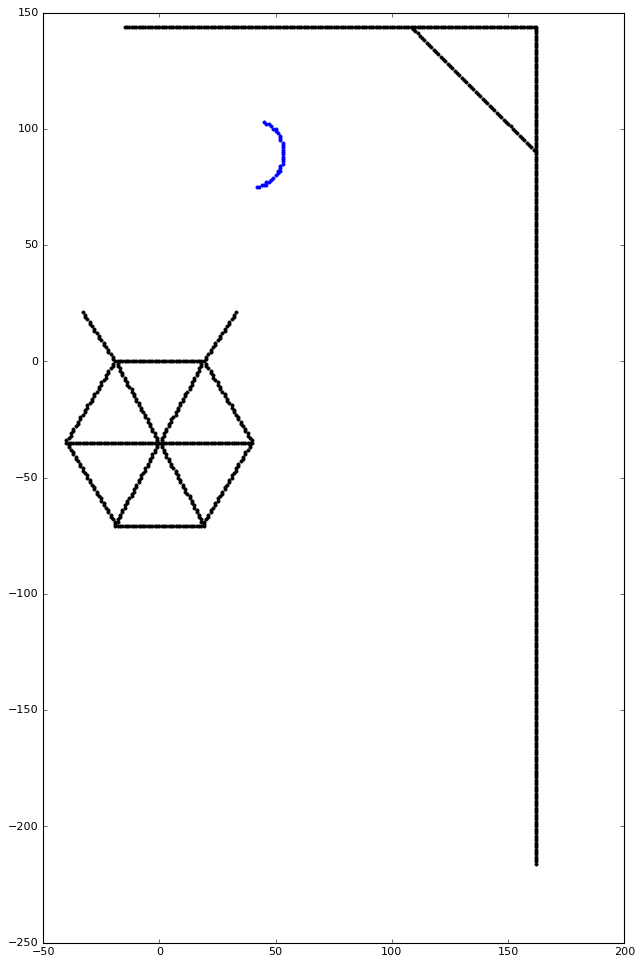

01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2
01:11:06 WARNING:Expected len(state)==3, instead: 2


Plotted 42/50 


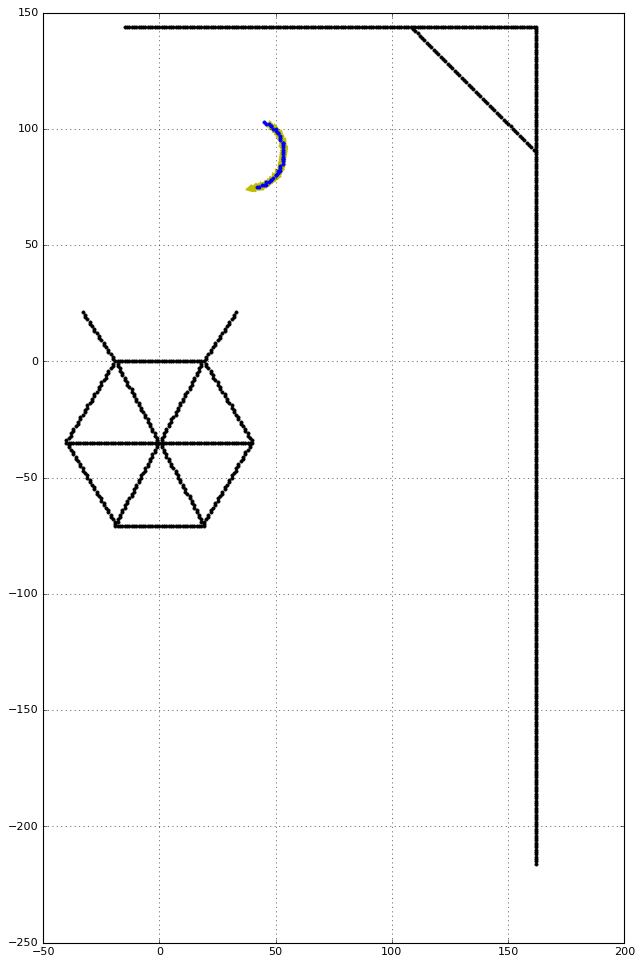

Path points:  50


In [586]:
mp = reload(mp)
# key = (115, 9, 174)
# key = (52, -14, 112)
# #key = (16, 74, 336)
# print "key: ", key
# points = mp.path_points(key,config,plot_obstacles=True,verbose=True)

# Tested on stage2:
config2 = mp.load_config('n_sample_stage2.pickle')
print "Count(config2): ", len(config2)
for k,v in config2.iteritems():
    if v.dist2() and v.goal2() and v.r() and int(v.dist2()) == 40:
        key=k
        break
print "key: ", key
key,config2,plot_obstacles=True,verbose=True)
print "Path points: ", len(points)

In [185]:
configg2 = mp.load_config(mp.N_STAGE2_FILEPATH)
mp.check_collisions_config(configg2)

03:58:19 INFO:Loading config file from stage2.pickle
03:58:19 INFO:Checking collisions
03:58:23 INFO:No collisions


In [240]:
pwd


u'/Users/mark/code/motionplanning'

In [245]:
#mp=reload(mp)
unreachables = mp.load_config('ne_sample_unreachables.pickle')

11:59:12 INFO:Loading pickle file from ne_sample_unreachables.pickle


In [ ]:
ls -l '/Users/mark/Valkyrie'

#  Plan Validation
(Work in Progress) attempts to recreate rasterized path exactly from trajectory paths stored in table, 
then that could be used to intersect with obstacles. 


01:11:13 INFO:Checking 110930 paths
01:11:13 INFO:Checked 1 so far
01:11:13 INFO:Checked 2 so far
01:11:13 INFO:Checked 3 so far
01:11:13 INFO:Checked 4 so far
01:11:13 INFO:Checked 5 so far
01:11:13 INFO:Checked 6 so far
01:11:13 INFO:Checked 7 so far
01:11:13 INFO:Checked 8 so far
01:11:13 INFO:Checked 9 so far
01:11:13 INFO:Checked 10 so far
01:11:13 INFO:Checked 11 so far
01:11:13 INFO:Checked 12 so far
01:11:13 INFO:Checked 13 so far
01:11:13 INFO:Checked 14 so far
01:11:13 INFO:Checked 15 so far
01:11:13 INFO:Checked 16 so far
01:11:13 WARNING:(-4, 44, 8) :  path state collides : (0, -2, 2)
01:11:13 WARNING:    (-4, 44, 8) : g1:    (-1, 20, 6)  r: 470.0  type: rh  d:  24.2   g2:           None  d2:   None  samples: 18


Plotted 2/2 


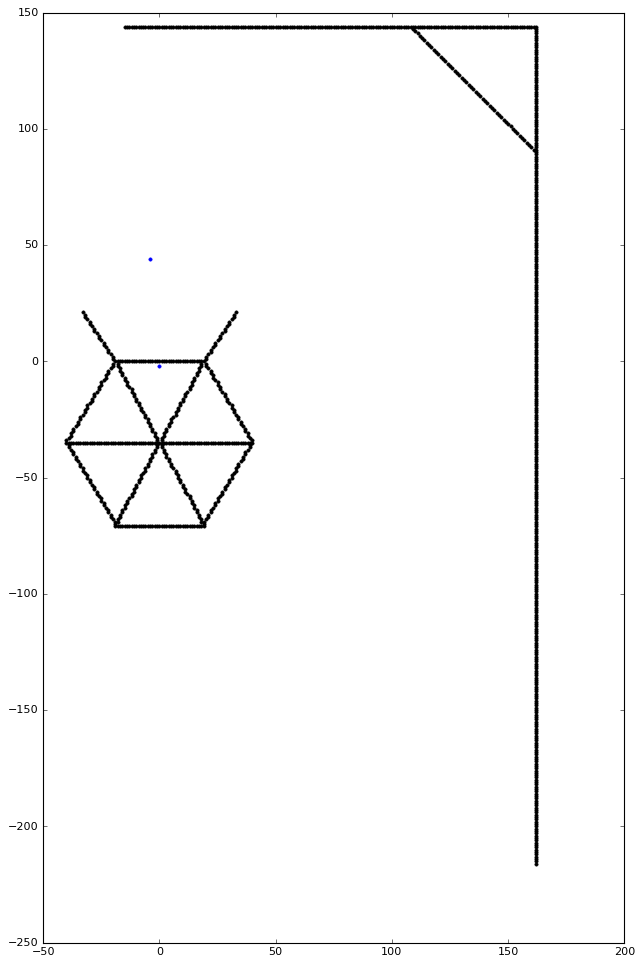

Plotted 2/2 


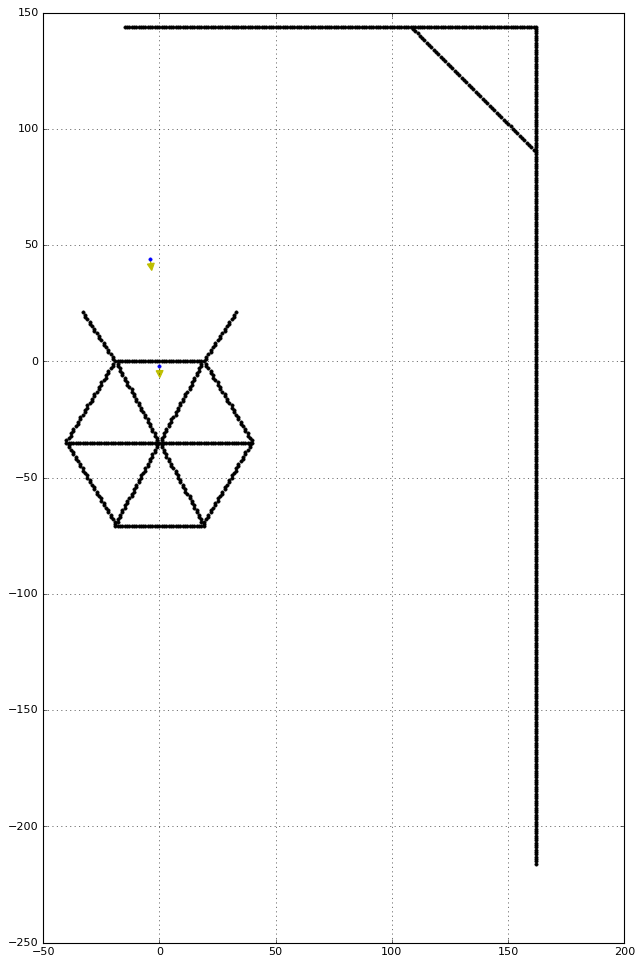

False

In [587]:
mp = reload(mp)
byes=set([(x,y,h) for h in mp.DGH for y in [15,16,17,18,19,20] for x in [-1,0,1]])
mp.paths_ok(config,byes,plot=True)

# Evaluating stage3 paths
Looking for source of large heading discrepancy in simulated paths.

In [4]:
config3 = 'n_'

['In',
 'Out',
 'StateP',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__name__',
 '__package__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'exit',
 'get_ipython',
 'logging',
 'mp',
 'np',
 'os',
 'pickle',
 'plt',
 'pylab',
 'quit',
 'sys',
 'time']

In [6]:
ls

arcs.ipynb                     ne_sample.pickle
evaluate.ipynb                 ne_sample_stage2.pickle
field_drawings.ipynb           ne_sample_stage4.pickle
load_mp.py                     ne_sample_traj.pickle
mem_profiling.py               ne_sample_unreachables.pickle
motion_planner.py              ne_stage1.pickle
motion_planner.pyc             ne_stage2.pickle
mp_deprecated.ipynb            ne_stage3.pickle
n_remaining.pickle             ne_stage4.pickle
n_sample.pickle                ne_unreachables.pickle
n_sample_stage2.pickle         oldcode/
n_sample_stage4.pickle         readme.md
n_sample_traj.pickle           requirements.txt
n_sample_unreachables.pickle   results.txt
n_stage1.pickle                runs/
n_stage2.pickle                sample_trajectories.ipynb
n_stage3.pickle                spacefilling_circles.ipynb
n_stage4.pickle                test-360.ipynb
n_unreachables.pickle          test.ipynb
ne_remaining.pickle


In [7]:
config4 = mp.load_config("n_sample_stage4.pickle")
print "Rows: %d" % len(config4)

06:45:49 INFO:Loading pickle file : n_sample_stage4.pickle


Rows: %d 285558


In [17]:
#
#    The state keys all have proper heading.
#
s3 = dict([(k,v) for k,v in config4.iteritems() if mp.is_stage3(v)])
print len(s3)
print len([(k,v) for k,v in config4.iteritems() if mp.is_stage3(v) and (k[2]<0 or k[2]>359)])
print len([(k,v) for k,v in config4.iteritems() if mp.is_stage3(v) and (v.goal1()[2]<0 or v.goal1()[2]>359)]) 
print len([(k,v) for k,v in config4.iteritems() if mp.is_stage3(v) and v.goal2() and (v.goal2()[2]<0 or v.goal2()[2]>359)]) 

12837
0
0
0


In [23]:
mp.angle_diff(-0,90)

-90

In [26]:
#configg = mp.load_config("n_sample_stage4.pickle")
configg = mp.load_config("n_stage4.pickle")
logging.info("Loaded %d rows", len(configg))
data = mp.validate_stage_trajectory(configg, max=100000, stage=3, maxd=36)
del configg
print len(data)


07:10:21 INFO:Loading pickle file : n_stage4.pickle
07:11:04 INFO:Loaded 3237212 rows
07:11:04 INFO:Calulating trajectories for 3237212 states


81531


In [45]:
def print_first(adict,max=5):
    ii=0
    for k,v in adict.iteritems():
        print k," : ",v
        print
        ii+=1
        if ii>max:
            break


In [46]:
#
#   {key => [(planned, predicted, primary, move, dist, r),...]
#
print_first(data,5)

(2, 43, 164)  :  [((2, 43, 0), (2, 43, 324), (1, 20, 354), 'qt', 0.1, None), ((1, 20, 354), (-12, 25, 318), (1, 20, 354), 'rh', 23.02, 250.0)]

(15, 45, 176)  :  [((15, 45, 342), (15, 45, 36), (1, 20, 354), 'qt', 0.1, None), ((11, 39, 314), (17, 38, 8), (1, 20, 354), 'rh', 7.28, 15.0), ((1, 20, 354), (27, 19, 48), (1, 20, 354), 'lh', 21.9, 31.5)]

(-1, 46, 158)  :  [((-1, 46, 0), (-1, 46, 18), (0, 20, 6), 'qt', 0.1, None), ((0, 20, 6), (6, 21, 18), (0, 20, 6), 'rh', 26.0, 1500.0)]

(25, 41, 8)  :  [((25, 41, 322), (25, 41, 268), (1, 20, 354), 'qt', 0.1, None), ((16, 36, 282), (15, 44, 228), (1, 20, 354), 'rh', 10.5, 15.0), ((1, 20, 354), (-6, 46, 298), (1, 20, 354), 'lh', 23.37, 19.0)]

(20, 38, 334)  :  [((20, 38, 306), (20, 38, 54), (1, 20, 354), 'qt', 0.1, None), ((15, 36, 286), (23, 34, 34), (1, 20, 354), 'rh', 5.41, 15.0), ((1, 20, 354), (42, 25, 100), (1, 20, 354), 'lh', 22.48, 19.5)]

(-2, 41, 326)  :  [((-2, 41, 2), (-2, 41, 326), (-1, 20, 6), 'qt', 0.1, None), ((-1, 20, 6), (-

In [50]:
data3={}
ii=0
max=5
for k,v in data.iteritems():
    for path in v:
        if path[3]=='qt':
            data3[k]=path
            break

print "All: %d   Stage3: %d" % (len(data),len(data3)) # should be equal
print
print_first(data3,5)
    

All: 81531   Stage3: 81531

(10, 52, 46)  :  ((10, 52, 348), (10, 52, 186), (1, 20, 354), 'qt', 0.1, None)

(2, 43, 164)  :  ((2, 43, 0), (2, 43, 324), (1, 20, 354), 'qt', 0.1, None)

(15, 45, 176)  :  ((15, 45, 342), (15, 45, 36), (1, 20, 354), 'qt', 0.1, None)

(-1, 46, 158)  :  ((-1, 46, 0), (-1, 46, 18), (0, 20, 6), 'qt', 0.1, None)

(20, 37, 318)  :  ((20, 37, 292), (20, 37, 58), (1, 20, 354), 'qt', 0.1, None)

(25, 41, 8)  :  ((25, 41, 322), (25, 41, 268), (1, 20, 354), 'qt', 0.1, None)



In [52]:
errt=0
count=0
for k,v in data3.iteritems():
    errt += abs(mp.angle_diff(v[0][2],v[1][2]))
    count+=1
print "Count: %d  Avg h_err: %.2f " % (count,float(errt)/count)

Count: 81531  Avg h_err: 90.48 


In [54]:
minerr=90
ii=0
max=10
for k,v in data3.iteritems():
    err = abs(mp.angle_diff(v[0][2],v[1][2]))
    if err>minerr:
        print "%.2f  :  %15s : %s " % (err, k, v)
        ii+=1
        if ii>max:
            break

162.00  :     (10, 52, 46) : ((10, 52, 348), (10, 52, 186), (1, 20, 354), 'qt', 0.1, None) 
126.00  :    (20, 37, 318) : ((20, 37, 292), (20, 37, 58), (1, 20, 354), 'qt', 0.1, None) 
126.00  :    (16, 43, 204) : ((16, 43, 338), (16, 43, 104), (1, 20, 354), 'qt', 0.1, None) 
108.00  :    (20, 38, 334) : ((20, 38, 306), (20, 38, 54), (1, 20, 354), 'qt', 0.1, None) 
144.00  :    (14, 48, 158) : ((14, 48, 342), (14, 48, 198), (1, 20, 354), 'qt', 0.1, None) 
108.00  :     (5, 52, 216) : ((5, 52, 348), (5, 52, 96), (0, 20, 354), 'qt', 0.1, None) 
108.00  :     (8, 31, 158) : ((8, 31, 306), (8, 31, 198), (1, 20, 354), 'qt', 0.1, None) 
180.00  :    (-3, 27, 290) : ((-3, 27, 30), (-3, 27, 210), (-1, 20, 6), 'qt', 0.1, None) 
180.00  :      (3, 37, 56) : ((3, 37, 316), (3, 37, 136), (-1, 20, 0), 'qt', 0.1, None) 
108.00  :     (2, 52, 212) : ((2, 52, 0), (2, 52, 252), (1, 20, 354), 'qt', 0.1, None) 
126.00  :    (13, 38, 106) : ((13, 38, 332), (13, 38, 206), (1, 20, 354), 'qt', 0.1, None) 
